# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
from sqlalchemy import create_engine

import numpy as np
import pandas as pd

import re

%matplotlib inline
import matplotlib.pyplot as plt

import nltk
nltk.download(['punkt', 'wordnet', 'stopwords'])
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import pickle

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vnaut\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vnaut\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vnaut\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
# load data from database
engine = create_engine('sqlite:///data/InsertDatabaseName.db')
df = pd.read_sql_table('InsertTableName', con=engine)

categories = df.columns[4:]

X = df[['message']].values[:, 0]
y = df[categories].values
 

### 2. Write a tokenization function to process your text data

In [3]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def tokenize(text, lemmatizer=WordNetLemmatizer()):
    # Detecte URLs
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, 'urlplaceholder')
    
    # Normalize and tokenize
    tokens = nltk.word_tokenize(re.sub(r"[^a-zA-Z0-9]", " ", text.lower()))
    
    # Remove stopwords
    tokens = [t for t in tokens if t not in stopwords.words('english')]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return tokens

In [4]:
# Check vocabulary
vect = CountVectorizer(tokenizer=tokenize)
X_vectorized = vect.fit_transform(X)

In [5]:
# Convert vocabulary into pandas.dataframe
keys, values = [], []
for k, v in vect.vocabulary_.items():
    keys.append(k)
    values.append(v)

vocabulary = pd.DataFrame.from_dict({'words': keys, 'counts': values})

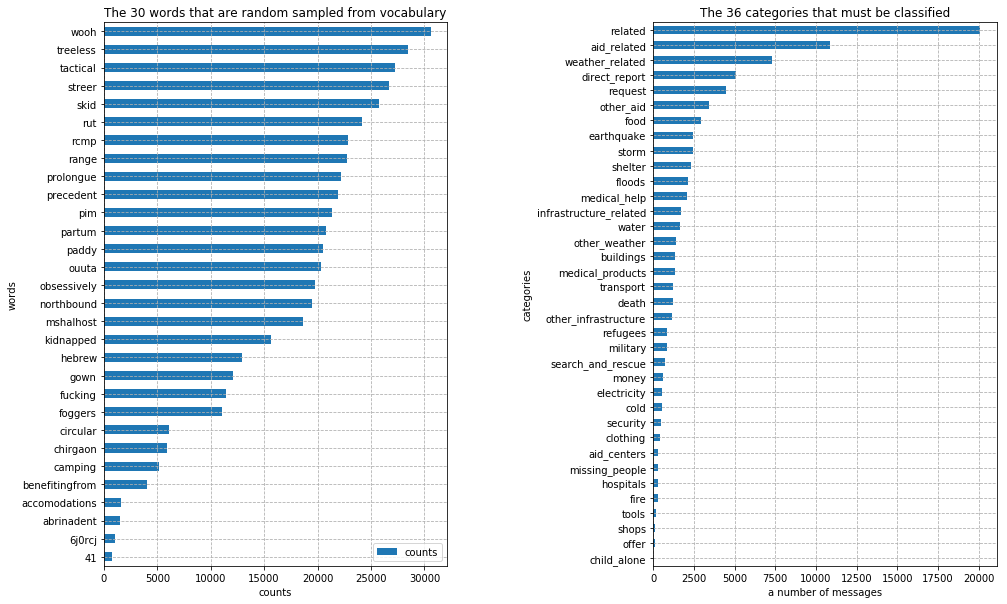

In [6]:
plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=0.6)

ax1 = plt.subplot(1, 2, 1)
vocabulary.sample(30, random_state=72).sort_values('counts').plot.barh(x='words', y='counts', ax=ax1, colormap='tab10')
plt.title('The 30 words that are random sampled from vocabulary')
plt.xlabel('counts')
plt.grid(linestyle='dashed')

ax2 = plt.subplot(1, 2, 2)
df[categories].sum().sort_values().plot.barh(ax=ax2)
plt.title('The 36 categories that must be classified')
plt.ylabel('categories')
plt.xlabel('a number of messages')
plt.grid(linestyle='dashed')

plt.show()

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [7]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier(class_weight='balanced')))
])

In [10]:
#pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...oob_score=False, random_state=None,
            verbose=0, warm_start=False),
           n_jobs=1))])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
pipeline.fit(X_train, y_train)

C:\Udacity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The de

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..._score=False,
            random_state=None, verbose=0, warm_start=False),
           n_jobs=None))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [10]:
def multioutput_classification_report(y_true, y_pred):
    for i in range(0, len(categories)):
        print(categories[i])
        print("\tAccuracy: {:.4f}\t\t% Precision: {:.4f}\t\t% Recall: {:.4f}\t\t% F1_score: {:.4f}".format(
            accuracy_score(y_true[:, i], y_pred[:, i]),
            precision_score(y_true[:, i], y_pred[:, i], average='weighted'),
            recall_score(y_true[:, i], y_pred[:, i], average='weighted'),
            f1_score(y_true[:, i], y_pred[:, i], average='weighted')
        ))
        
        print("--------------------------------------------------")

In [11]:
y_pred = pipeline.predict(X_train)

In [12]:
multioutput_classification_report(y_train, y_pred)

related
	Accuracy: 0.9892		% Precision: 0.9892		% Recall: 0.9892		% F1_score: 0.9892
--------------------------------------------------
request
	Accuracy: 0.9886		% Precision: 0.9886		% Recall: 0.9886		% F1_score: 0.9884
--------------------------------------------------
offer
	Accuracy: 0.9983		% Precision: 0.9983		% Recall: 0.9983		% F1_score: 0.9982
--------------------------------------------------
aid_related
	Accuracy: 0.9857		% Precision: 0.9858		% Recall: 0.9857		% F1_score: 0.9856
--------------------------------------------------
medical_help
	Accuracy: 0.9899		% Precision: 0.9899		% Recall: 0.9899		% F1_score: 0.9897
--------------------------------------------------
medical_products
	Accuracy: 0.9911		% Precision: 0.9911		% Recall: 0.9911		% F1_score: 0.9907
--------------------------------------------------
search_and_rescue
	Accuracy: 0.9938		% Precision: 0.9939		% Recall: 0.9938		% F1_score: 0.9935
--------------------------------------------------
security
	Accuracy: 0.

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
multioutput_classification_report(y_test, y_pred)

related
	Accuracy: 0.8190		% Precision: 0.8107		% Recall: 0.8190		% F1_score: 0.8136
--------------------------------------------------
request
	Accuracy: 0.8943		% Precision: 0.8873		% Recall: 0.8943		% F1_score: 0.8835
--------------------------------------------------
offer
	Accuracy: 0.9954		% Precision: 0.9912		% Recall: 0.9954		% F1_score: 0.9933
--------------------------------------------------
aid_related
	Accuracy: 0.7437		% Precision: 0.7433		% Recall: 0.7437		% F1_score: 0.7384
--------------------------------------------------
medical_help
	Accuracy: 0.9207		% Precision: 0.8946		% Recall: 0.9207		% F1_score: 0.8907
--------------------------------------------------
medical_products
	Accuracy: 0.9498		% Precision: 0.9365		% Recall: 0.9498		% F1_score: 0.9297
--------------------------------------------------
search_and_rescue
	Accuracy: 0.9715		% Precision: 0.9593		% Recall: 0.9715		% F1_score: 0.9599
--------------------------------------------------
security
	Accuracy: 0.

C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 6. Improve your model
Use grid search to find better parameters. 

In [15]:
parameters = {
    'clf__estimator__n_estimators': [20, 50]
}

cv = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=3, scoring='f1_weighted', verbose=3) 

In [16]:
cv.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] clf__estimator__n_estimators=20 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__n_estimators=20, score=0.5400039603178893, total= 2.3min
[CV] clf__estimator__n_estimators=20 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__n_estimators=20, score=0.5366535302346546, total= 2.4min
[CV] clf__estimator__n_estimators=20 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  7.1min remaining:    0.0s
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__n_estimators=20, score=0.5375579717890702, total= 2.3min
[CV] clf__estimator__n_estimators=50 .................................


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__n_estimators=50, score=0.5503217299609438, total= 3.1min
[CV] clf__estimator__n_estimators=50 .................................


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__n_estimators=50, score=0.5468279142155091, total= 3.1min
[CV] clf__estimator__n_estimators=50 .................................


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__n_estimators=50, score=0.5495795465995783, total= 3.1min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 23.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..._score=False,
            random_state=None, verbose=0, warm_start=False),
           n_jobs=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__estimator__n_estimators': [20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=3)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [17]:
y_pred = cv.predict(X_train)

In [18]:
multioutput_classification_report(y_train, y_pred)

related
	Accuracy: 0.9981		% Precision: 0.9981		% Recall: 0.9981		% F1_score: 0.9981
--------------------------------------------------
request
	Accuracy: 0.9984		% Precision: 0.9984		% Recall: 0.9984		% F1_score: 0.9984
--------------------------------------------------
offer
	Accuracy: 0.9997		% Precision: 0.9997		% Recall: 0.9997		% F1_score: 0.9997
--------------------------------------------------
aid_related
	Accuracy: 0.9985		% Precision: 0.9985		% Recall: 0.9985		% F1_score: 0.9985
--------------------------------------------------
medical_help
	Accuracy: 0.9989		% Precision: 0.9989		% Recall: 0.9989		% F1_score: 0.9989
--------------------------------------------------
medical_products
	Accuracy: 0.9994		% Precision: 0.9994		% Recall: 0.9994		% F1_score: 0.9994
--------------------------------------------------
search_and_rescue
	Accuracy: 0.9991		% Precision: 0.9991		% Recall: 0.9991		% F1_score: 0.9991
--------------------------------------------------
security
	Accuracy: 0.

In [19]:
y_pred = cv.predict(X_test)

In [20]:
multioutput_classification_report(y_test, y_pred)

related
	Accuracy: 0.8290		% Precision: 0.8167		% Recall: 0.8290		% F1_score: 0.8172
--------------------------------------------------
request
	Accuracy: 0.9016		% Precision: 0.8960		% Recall: 0.9016		% F1_score: 0.8925
--------------------------------------------------
offer
	Accuracy: 0.9954		% Precision: 0.9912		% Recall: 0.9954		% F1_score: 0.9933
--------------------------------------------------
aid_related
	Accuracy: 0.7807		% Precision: 0.7796		% Recall: 0.7807		% F1_score: 0.7793
--------------------------------------------------
medical_help
	Accuracy: 0.9204		% Precision: 0.8935		% Recall: 0.9204		% F1_score: 0.8878
--------------------------------------------------
medical_products
	Accuracy: 0.9525		% Precision: 0.9488		% Recall: 0.9525		% F1_score: 0.9343
--------------------------------------------------
search_and_rescue
	Accuracy: 0.9716		% Precision: 0.9613		% Recall: 0.9716		% F1_score: 0.9584
--------------------------------------------------
security
	Accuracy: 0.

C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [21]:
pipeline_ada = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(
        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'))
    ))
])

parameters_ada = {
    'clf__estimator__learning_rate': [0.1, 0.3],
    'clf__estimator__n_estimators': [100, 200]
}

cv_ada = GridSearchCV(estimator=pipeline_ada, param_grid=parameters_ada, cv=3, scoring='f1_weighted', verbose=3)

In [22]:
cv_ada.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=100 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=100, score=0.6042028647422537, total= 3.1min
[CV] clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=100, score=0.6011971865237221, total= 3.0min
[CV] clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.5min remaining:    0.0s
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=100, score=0.6077380411998092, total= 3.1min
[CV] clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=200 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=200, score=0.6200454882447067, total= 4.3min
[CV] clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=200 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=200, score=0.617982397899281, total= 4.2min
[CV] clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=200 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.1, clf__estimator__n_estimators=200, score=0.6166864746838355, total= 4.2min
[CV] clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=100 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=100, score=0.6261073521840435, total= 2.9min
[CV] clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=100 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=100, score=0.6255766392394456, total= 2.9min
[CV] clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=100 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=100, score=0.6246905684334181, total= 2.9min
[CV] clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=200 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=200, score=0.6329152833425857, total= 4.2min
[CV] clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=200 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=200, score=0.6345162459703474, total= 4.2min
[CV] clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=200 


C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Udacity\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


[CV]  clf__estimator__learning_rate=0.3, clf__estimator__n_estimators=200, score=0.6316006267147705, total= 4.2min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 58.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...'best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
           n_jobs=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'clf__estimator__learning_rate': [0.1, 0.3], 'clf__estimator__n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=3)

In [23]:
# Best parameters set
cv_ada.best_params_

{'clf__estimator__learning_rate': 0.3, 'clf__estimator__n_estimators': 200}

In [24]:
y_pred = cv_ada.predict(X_train)

In [25]:
multioutput_classification_report(y_train, y_pred)

related
	Accuracy: 0.7380		% Precision: 0.8352		% Recall: 0.7380		% F1_score: 0.7574
--------------------------------------------------
request
	Accuracy: 0.8683		% Precision: 0.8879		% Recall: 0.8683		% F1_score: 0.8750
--------------------------------------------------
offer
	Accuracy: 0.9667		% Precision: 0.9960		% Recall: 0.9667		% F1_score: 0.9795
--------------------------------------------------
aid_related
	Accuracy: 0.7798		% Precision: 0.7785		% Recall: 0.7798		% F1_score: 0.7787
--------------------------------------------------
medical_help
	Accuracy: 0.8967		% Precision: 0.9304		% Recall: 0.8967		% F1_score: 0.9091
--------------------------------------------------
medical_products
	Accuracy: 0.9100		% Precision: 0.9559		% Recall: 0.9100		% F1_score: 0.9269
--------------------------------------------------
search_and_rescue
	Accuracy: 0.8779		% Precision: 0.9722		% Recall: 0.8779		% F1_score: 0.9153
--------------------------------------------------
security
	Accuracy: 0.

In [26]:
y_pred = cv_ada.predict(X_test)

In [27]:
multioutput_classification_report(y_test, y_pred)

related
	Accuracy: 0.7251		% Precision: 0.8264		% Recall: 0.7251		% F1_score: 0.7465
--------------------------------------------------
request
	Accuracy: 0.8547		% Precision: 0.8779		% Recall: 0.8547		% F1_score: 0.8629
--------------------------------------------------
offer
	Accuracy: 0.9600		% Precision: 0.9921		% Recall: 0.9600		% F1_score: 0.9754
--------------------------------------------------
aid_related
	Accuracy: 0.7722		% Precision: 0.7709		% Recall: 0.7722		% F1_score: 0.7706
--------------------------------------------------
medical_help
	Accuracy: 0.8830		% Precision: 0.9125		% Recall: 0.8830		% F1_score: 0.8950
--------------------------------------------------
medical_products
	Accuracy: 0.8988		% Precision: 0.9418		% Recall: 0.8988		% F1_score: 0.9160
--------------------------------------------------
search_and_rescue
	Accuracy: 0.8618		% Precision: 0.9596		% Recall: 0.8618		% F1_score: 0.9033
--------------------------------------------------
security
	Accuracy: 0.

### 9. Export your model as a pickle file

In [28]:
with open('adaboost_cv.pkl', 'wb') as file:
    pickle.dump(cv_ada, file)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.